# P6

## Q1
P5delta

Gary Watson

Alex Hromada

Ethan Matzdorf

CS4821

In [ ]:
from os import listdir
from os.path import isfile, join
import nltk
import string
from itertools import chain
import pandas as pd
import numpy as np
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import matplotlib.pyplot as plt
from matplotlib import cm
import math 
import seaborn as sb
%matplotlib inline


## Q4

In [ ]:
item_data = [['M', 'O', 'N', 'K', 'E', 'Y'],
             ['D', 'O', 'N', 'K', 'E', 'Y'],
             ['M', 'A', 'K', 'E'],
             ['M', 'U', 'C', 'K', 'Y'],
             ['C', 'O', 'O', 'K', 'I', 'E']
            ]

te = TransactionEncoder()
tedata = te.fit(item_data).transform(item_data)
itemdf = pd.DataFrame(tedata, columns=te.columns_)
itemdf

,A,C,D,E,I,K,M,N,O,U,Y
0,False,False,False,True,False,True,True,True,True,False,True
1,False,False,True,True,False,True,False,True,True,False,True
2,True,False,False,True,False,True,True,False,False,False,False
3,False,True,False,False,False,True,True,False,False,True,True
4,False,True,False,True,True,True,False,False,True,False,False


In [ ]:
sup = itemdf.sum()
sup

A    1
C    2
D    1
E    4
I    1
K    5
M    3
N    2
O    3
U    1
Y    3
dtype: int64

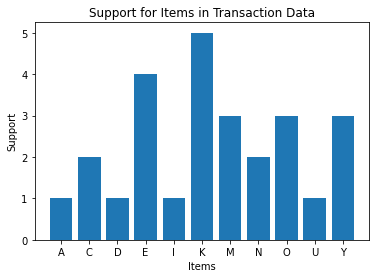

In [ ]:
plt.bar(list(range(0,11)), sup, tick_label = itemdf.columns)
plt.xlabel('Items')
plt.ylabel('Support')
plt.title('Support for Items in Transaction Data');


In [ ]:
fi = apriori(itemdf, min_support=0.6, use_colnames=True)
fi

,support,itemsets
0,0.8,(E)
1,1.0,(K)
2,0.6,(M)
3,0.6,(O)
4,0.6,(Y)
5,0.8,"(K, E)"
6,0.6,"(O, E)"
7,0.6,"(M, K)"
8,0.6,"(O, K)"
9,0.6,"(Y, K)"


In [ ]:
rules = association_rules(fi, metric='confidence', min_threshold=0.7)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(K),(E),1.0,0.8,0.8,0.80,1.00,0.00,1.0
1,(E),(K),0.8,1.0,0.8,1.00,1.00,0.00,inf
2,(O),(E),0.6,0.8,0.6,1.00,1.25,0.12,inf
3,(E),(O),0.8,0.6,0.6,0.75,1.25,0.12,1.6
4,(M),(K),0.6,1.0,0.6,1.00,1.00,0.00,inf
5,(O),(K),0.6,1.0,0.6,1.00,1.00,0.00,inf
6,(Y),(K),0.6,1.0,0.6,1.00,1.00,0.00,inf
7,"(O, K)",(E),0.6,0.8,0.6,1.00,1.25,0.12,inf
8,"(O, E)",(K),0.6,1.0,0.6,1.00,1.00,0.00,inf
9,"(K, E)",(O),0.8,0.6,0.6,0.75,1.25,0.12,1.6


## Q5(a)

In [ ]:
productSmall = pd.read_csv("order_products__train_small.csv")
productMed = pd.read_csv("orders_product__train_med.csv")
productNames = pd.read_csv("products.csv")

Text(0.5, 1.0, 'Histogram of products per order')

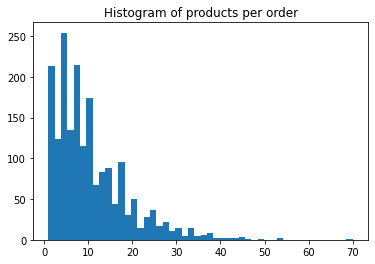

In [ ]:
productSmallOrderAgg = productSmall.groupby(by='order_id').agg('count')
plt.hist(productSmallOrderAgg['product_id'], bins='auto')
plt.title("Histogram of products per order")

Text(0.5, 1.0, 'Histogram of products per order')

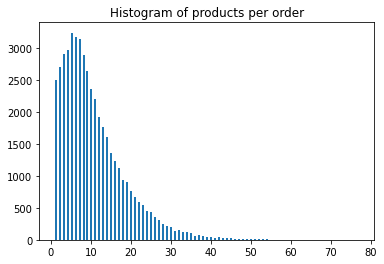

In [ ]:
productMedOrderAgg = productMed.groupby(by='order_id').agg('count')
plt.hist(productMedOrderAgg['product_id'], bins='auto')
plt.title("Histogram of products per order")

## Q(5)(b)

In [ ]:
productSmallOrderAgg = productSmall.groupby(by='product_id').agg('count')
productSmallOrderAgg
productSmallOrderSorted = productSmallOrderAgg \
                            .sort_values(by='order_id').tail(15)
productSmallTop15 = pd.DataFrame(productSmallOrderSorted['order_id'])
productSmallTop15.columns = ['frequency']
productSmallTop15


,frequency
product_id,
45007,61
40706,66
27966,69
30391,73
16797,75
39275,79
27845,83
26209,90
47766,92


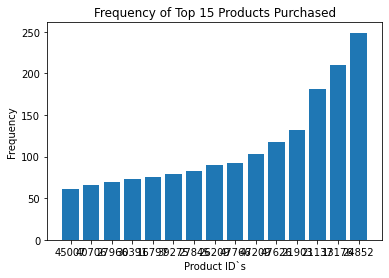

In [ ]:
plt.bar(list(range(0,15)), 
        productSmallTop15['frequency'].tolist(),
        tick_label = productSmallTop15.index)
plt.xlabel('Product ID`s')
plt.ylabel('Frequency')
plt.title('Frequency of Top 15 Products Purchased');